In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import random
import os
import cv2


# Any results you write to the current directory are saved as output.

['sampleSubmission.csv', 'train', 'test1']


In [19]:
filenames = os.listdir("../input/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [20]:
df.head()

,filename,category
0,dog.5743.jpg,1
1,cat.10685.jpg,0
2,cat.5263.jpg,0
3,dog.8472.jpg,1
4,cat.10632.jpg,0


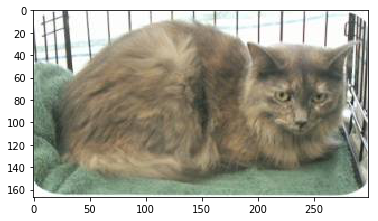

In [21]:
sample = random.choice(filenames)
image = load_img("../input/train/train/"+sample)
plt.imshow(image)

In [22]:
DATADIR='PetImages/'
CATEGORIES=['Cat','Dog']
IMG_SIZE=100
training_data=[]
for each in df['filename'].iteritems():
    data_dir="../input/train/train"
    category = each[1].split('.')[0]
    if category == 'dog':
        class_num=1
    else:
        class_num=0
    img_array=cv2.imread(os.path.join(data_dir,each[1]),cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    training_data.append([new_array,class_num])
print(len(training_data))

25000


In [27]:
import random
random.shuffle(training_data)

In [28]:
X=[]
y=[]
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [25]:
#saving data
import pickle
pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [29]:
pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)
pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X=X/255.0
model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X,y,batch_size=32,epochs=5,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.6826 - acc: 0.6201 - val_loss: 0.6195 - val_acc: 0.6520
Epoch 2/5
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.5769 - acc: 0.7058 - val_loss: 0.5841 - val_acc: 0.6966
Epoch 3/5
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.5187 - acc: 0.7469 - val_loss: 0.5227 - val_acc: 0.7508
Epoch 4/5
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.4863 - acc: 0.7675 - val_loss: 0.5231 - val_acc: 0.7486
Epoch 5/5
20000/20000 [==============================] - 22s 1ms/sample - loss: 0.4595 - acc: 0.7821 - val_loss: 0.4921 - val_acc: 0.7668
